In [1]:
# Import the necessary packages
import numpy as np

class Perceptron:
  '''
    N: The number of columns in the input feature vectors 
    alpha: Learning Rate
  '''
  def __init__(self, N, alpha=0.1):
    # Initialize te weight matrix and store the learning rate
    self.W = np.random.randn(N + 1) / np.sqrt(N)
    self.alpha = alpha

  def step(self, x):
    return 1 if x > 0 else 0

  def fit (self, X, y, epochs=10):
    '''
      X: Training Data
      y: Labels
    '''
    X = np.c_[X, np.ones((X.shape[0]))]
    # Loop over the desired number of epochs
    for epoch in np.arange(0, epochs):
      # Loop over each individual data point
      for (x, target) in zip(X, y):
        # Take the dot product between the input features
        # and te weight matrix, then pass this value
        # through te step function to obtain the prediction
        p = self.step(np.dot(x, self.W))
        # Only perform a weight update if our prediction
        # does not match the target
        if p != target:
          # Determine the error
          error = p - target
          # Update the weight matrix
          self.W += -self.alpha * error * x

  def predict(self, X, addBis=True):
    X = np.atleast_2d(X)
    if addBis:
      X = np.c_[X, np.ones((X.shape[0]))]
    return self.step(np.dot(X, self.W))  

In [2]:
# Construct the OR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])
# Define our perceptron and train int
print("[INFO] training percpteron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20)

[INFO] training percpteron...


In [3]:
# Now that our preceptron is trained we can evaluate it
print("[INFO] testing percpteron...")
# Now our network is trained, loop over the points
for (x, target) in zip(X, y):
  pred = p.predict(x)
  print("[INFO] data={}, ground-truth={}, pred={}".format(x, target[0], pred))

[INFO] testing percpteron...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=1, pred=1
[INFO] data=[1 0], ground-truth=1, pred=1
[INFO] data=[1 1], ground-truth=1, pred=1


In [4]:
# Construct the AND dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])
# Define our perceptron and train int
print("[INFO] training percpteron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20)
# Now that our preceptron is trained we can evaluate it
print("[INFO] testing percpteron...")
# Now our network is trained, loop over the points
for (x, target) in zip(X, y):
  pred = p.predict(x)
  print("[INFO] data={}, ground-truth={}, pred={}".format(x, target[0], pred))

[INFO] training percpteron...
[INFO] testing percpteron...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=0, pred=0
[INFO] data=[1 0], ground-truth=0, pred=0
[INFO] data=[1 1], ground-truth=1, pred=1


In [8]:
# Construct the XOR dataset ---> Need to multilayer perceptron(MLP) or feed forward neural network
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
# Define our perceptron and train int
print("[INFO] training percpteron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20)
# Now that our preceptron is trained we can evaluate it
print("[INFO] testing percpteron...")
# Now our network is trained, loop over the points
for (x, target) in zip(X, y):
  pred = p.predict(x)
  print("[INFO] data={}, ground-truth={}, pred={}".format(x, target[0], pred))

[INFO] training percpteron...
[INFO] testing percpteron...
[INFO] data=[0 0], ground-truth=0, pred=1
[INFO] data=[0 1], ground-truth=1, pred=1
[INFO] data=[1 0], ground-truth=1, pred=0
[INFO] data=[1 1], ground-truth=0, pred=0


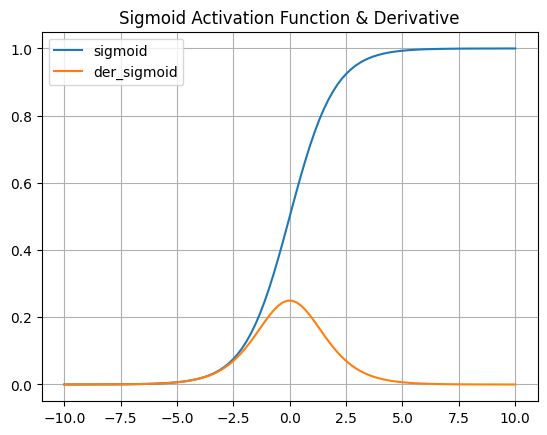

In [6]:
#Activation Functions
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Activation Function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Derivative of Sigmoid
def der_sigmoid(x):
    return sigmoid(x) * (1- sigmoid(x))

# Generating data to plot
x_data = np.linspace(-10,10,100)
y_data = sigmoid(x_data)
dy_data = der_sigmoid(x_data)

# Plotting
plt.plot(x_data, y_data, x_data, dy_data)
plt.title('Sigmoid Activation Function & Derivative')
plt.legend(['sigmoid','der_sigmoid'])
plt.grid()
plt.show()

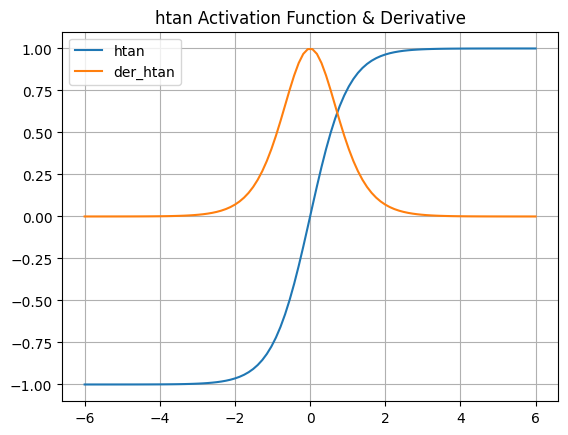

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperbolic Tangent (htan) Activation Function
def htan(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

# htan derivative
def der_htan(x):
    return 1 - htan(x) * htan(x)

# Generating data for Graph
x_data = np.linspace(-6,6,100)
y_data = htan(x_data)
dy_data = der_htan(x_data)

# Graph
plt.plot(x_data, y_data, x_data, dy_data)
plt.title('htan Activation Function & Derivative')
plt.legend(['htan','der_htan'])
plt.grid()

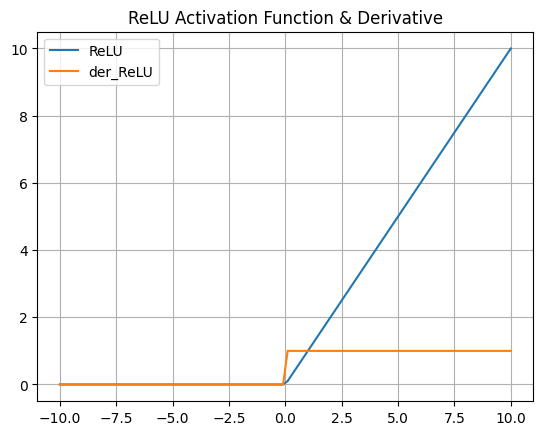

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Rectified Linear Unit (ReLU)
def ReLU(x):
    data = [max(0,value) for value in x]
    return np.array(data, dtype=float)

# Derivative for ReLU
def der_ReLU(x):
    data = [1 if value>0 else 0 for value in x]
    return np.array(data, dtype=float)

# Generating data for Graph
x_data = np.linspace(-10,10,100)
y_data = ReLU(x_data)
dy_data = der_ReLU(x_data)

# Graph
plt.plot(x_data, y_data, x_data, dy_data)
plt.title('ReLU Activation Function & Derivative')
plt.legend(['ReLU','der_ReLU'])
plt.grid()
plt.show()

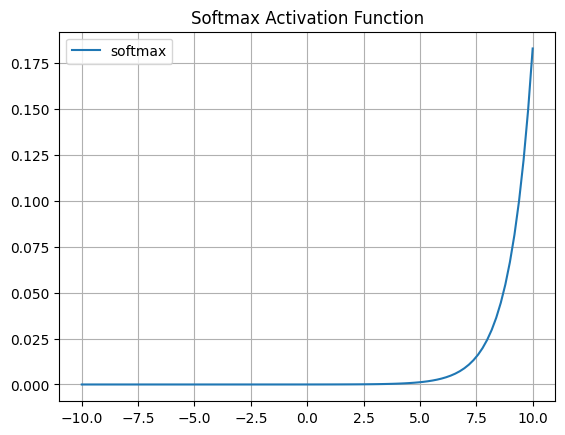

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Softmax Activation Function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

# Generating data to plot
x_data = np.linspace(-10,10,100)
y_data = softmax(x_data)

# Plotting
plt.plot(x_data, y_data)
plt.title('Softmax Activation Function')
plt.legend(['softmax'])
plt.grid()
plt.show()

In [20]:
#LossFunctions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from itertools import product

In [21]:
def func(x):
    return x**2 - 2*x - 3

def fprime(x):
    return 2*x - 2

In [31]:
def plotFunc(x0):
    x = np.linspace(-5, 7, 100)
    plt.plot(x, func(x))
    plt.plot(x0, func(x0), 'ko')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.title('0bjective Function')
    
def plotPath(xs, ys, x0):
    plotFunc(x0)
    plt.plot(xs, ys, linestyle='--', marker='o', color='#F12F79')
    plt.plot(xs[-1], ys[-1], 'ko')

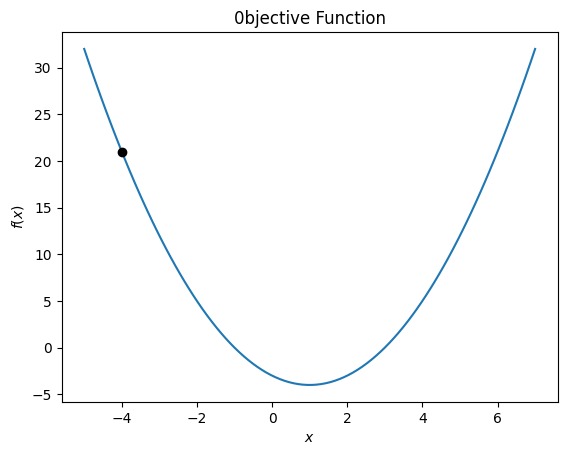

In [32]:
x0=-4
plotFunc(x0)

In [33]:
def GradientDescentSimple(func, fprime, x0, alpha, tol=1e-5, max_iter=1000):
    # initialize x, fo), and -f'(x)
    xk = x0
    fk = func(xk)
    pk = ~fprime(xk)
    # initialize number of steps, save x and f(x)
    num_iter = 0
    curve_x = [xk]
    curve_y = [fk]
    # take steps
    while abs(pk) > tol and num_iter < max_iter:
        # calculate new x, f(x), and -f'(x)
        xk = xk + alpha * pk
        fk = func(xk)
        pk = -fprime(xk)
        # increase number of steps by 1, save new x and f(x)
        num_iter += 1
        curve_x.append(xk)
        curve_y.append(fk)
    # print results
    if num_iter == max_iter:
        print('Gradient descent does not converge.')
    else:
        print('Solution found:\n y = {:.4f}\n x = {:.4f}'.format(fk, xk))
    return curve_x, curve_y        

Solution found:
 y = -4.0000
 x = 1.0000


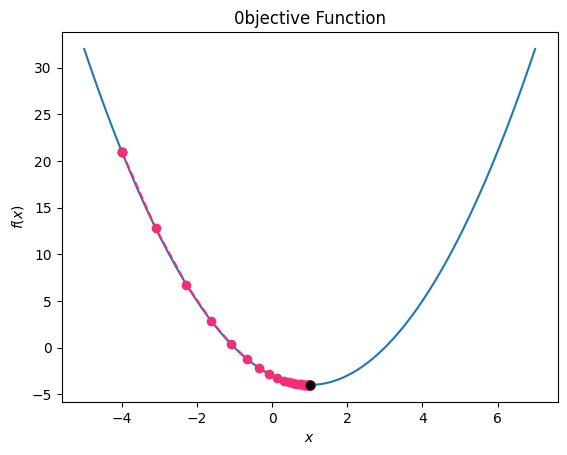

In [35]:
xs, ys = GradientDescentSimple(func, fprime, x0, alpha=0.1)
plotPath(xs, ys, x0)

Solution found:
 y = -4.0000
 x = 1.0000


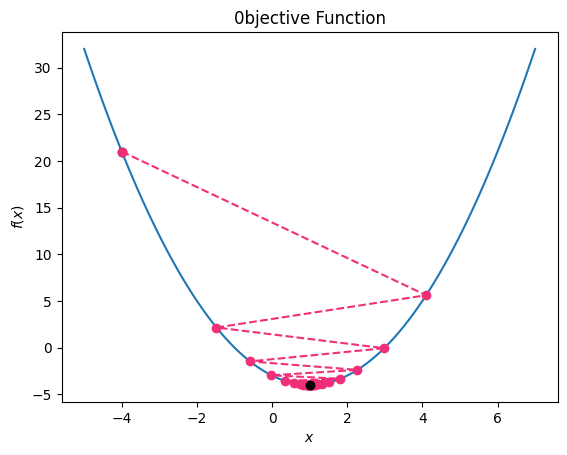

In [37]:
xs, ys = GradientDescentSimple(func, fprime, x0, alpha=0.9)
plotPath(xs, ys, x0)

Gradient descent does not converge.


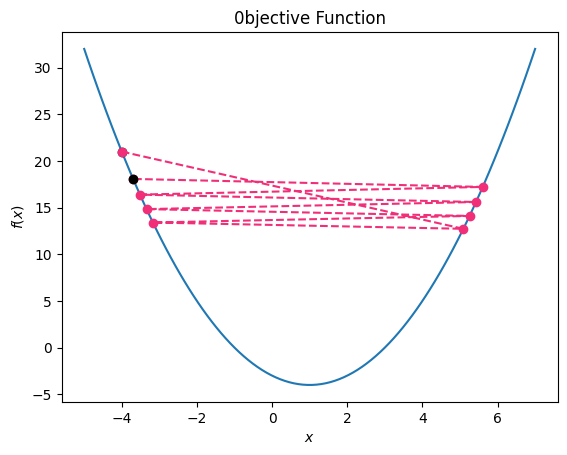

In [39]:
xs, ys = GradientDescentSimple(func, fprime, x0, alpha=1.01, max_iter=8)
plotPath(xs, ys, x0)

In [40]:
#Keras
import pandas as pd

In [42]:
df = pd.read_csv('housepricedata.csv')

In [43]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [44]:
dataset = df.values

In [45]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [46]:
X = dataset[:,0:10]

In [47]:
Y = dataset[:,10]

In [48]:
from sklearn import preprocessing

In [49]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [50]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [51]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [54]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [56]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [59]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [64]:
#https://www.kaggle.com/general/274656
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [65]:
model = Sequential([
Dense(32, activation='relu', input_shape=(10,)),
Dense(32, activation='relu'),
Dense(1, activation='sigmoid'),
])

In [66]:
model.compile(optimizer='sgd',
loss='binary_crossentropy',
metrics=['accuracy'])

In [67]:
hist = model.fit(X_train, Y_train,
batch_size=32, epochs=100,
validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 12ms/step - loss: 0.6969 - accuracy: 0.5020 - val_loss: 0.6866 - val_accuracy: 0.5799
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.5920 - val_loss: 0.6809 - val_accuracy: 0.6027
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.6526 - val_loss: 0.6765 - val_accuracy: 0.7078
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.6947 - val_loss: 0.6723 - val_accuracy: 0.7123
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6698 - accuracy: 0.6986 - val_loss: 0.6681 - val_accuracy: 0.6941
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6643 - accuracy: 0.6937 - val_loss: 0.6633 - val_accuracy: 0.7032
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6577 - accuracy: 0.7123 - val_loss: 0.6569 - val_accuracy: 0.7215
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3007 - accuracy: 0.8885 - val_loss: 0.3662 - val_accuracy: 0.8356
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.8855 - val_loss: 0.3646 - val_accuracy: 0.8356
Epoch 61/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2974 - accuracy: 0.8894 - val_loss: 0.3646 - val_accuracy: 0.8311
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2955 - accuracy: 0.8904 - val_loss: 0.3617 - val_accuracy: 0.8402
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2945 - accuracy: 0.8924 - val_loss: 0.3610 - val_accuracy: 0.8402
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2930 - accuracy: 0.8904 - val_loss: 0.3624 - val_accuracy: 0.8311
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2913 - accuracy: 0.8914 - val_loss: 0.3568 - val_accuracy: 0.8447
Epoch 

In [69]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.3065 - accuracy: 0.8676


0.8675799369812012

In [70]:
import matplotlib.pyplot as plt

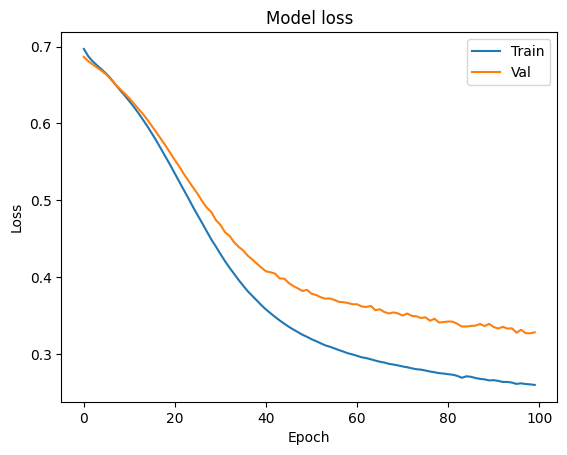

In [72]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

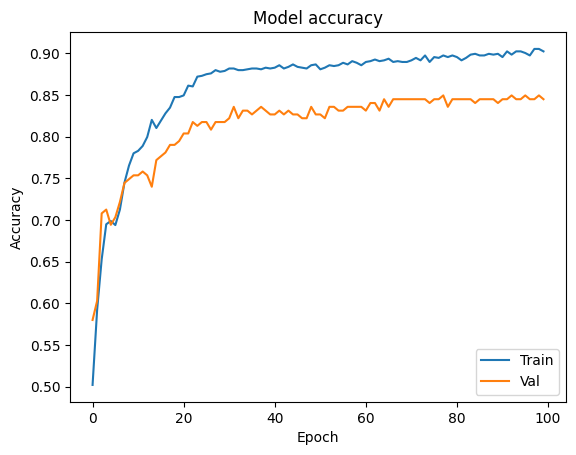

In [74]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [75]:
model_2 = Sequential([
Dense(1000, activation='relu', input_shape=(10,)),
Dense(1000, activation='relu'),
Dense(1000, activation='relu'),
Dense(1000, activation='relu'),
Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
batch_size=32, epochs=100,
validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 53ms/step - loss: 0.4557 - accuracy: 0.7994 - val_loss: 0.4957 - val_accuracy: 0.8174
Epoch 2/100
32/32 [==============================] - 2s 48ms/step - loss: 0.3284 - accuracy: 0.8630 - val_loss: 0.4021 - val_accuracy: 0.8219
Epoch 3/100
32/32 [==============================] - 2s 48ms/step - loss: 0.2916 - accuracy: 0.8894 - val_loss: 0.3496 - val_accuracy: 0.8493
Epoch 4/100
32/32 [==============================] - 2s 52ms/step - loss: 0.2719 - accuracy: 0.8992 - val_loss: 0.3500 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 2s 73ms/step - loss: 0.2726 - accuracy: 0.8865 - val_loss: 0.3116 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 2s 53ms/step - loss: 0.2451 - accuracy: 0.9178 - val_loss: 0.3372 - val_accuracy: 0.8402
Epoch 7/100
32/32 [==============================] - 2s 50ms/step - loss: 0.2408 - accuracy: 0.9178 - val_loss: 0.3065 - val_accuracy: 0.8767
Epoch 

32/32 [==============================] - 2s 61ms/step - loss: 0.1550 - accuracy: 0.9442 - val_loss: 0.3196 - val_accuracy: 0.8813
Epoch 59/100
32/32 [==============================] - 2s 64ms/step - loss: 0.1407 - accuracy: 0.9472 - val_loss: 0.3958 - val_accuracy: 0.8493
Epoch 60/100
32/32 [==============================] - 2s 59ms/step - loss: 0.1506 - accuracy: 0.9364 - val_loss: 0.4049 - val_accuracy: 0.8584
Epoch 61/100
32/32 [==============================] - 2s 59ms/step - loss: 0.1279 - accuracy: 0.9511 - val_loss: 0.3931 - val_accuracy: 0.8813
Epoch 62/100
32/32 [==============================] - 2s 56ms/step - loss: 0.1300 - accuracy: 0.9530 - val_loss: 0.4052 - val_accuracy: 0.8858
Epoch 63/100
32/32 [==============================] - 2s 59ms/step - loss: 0.1386 - accuracy: 0.9462 - val_loss: 0.3986 - val_accuracy: 0.8539
Epoch 64/100
32/32 [==============================] - 2s 54ms/step - loss: 0.1388 - accuracy: 0.9491 - val_loss: 0.4229 - val_accuracy: 0.8447
Epoch 65/100

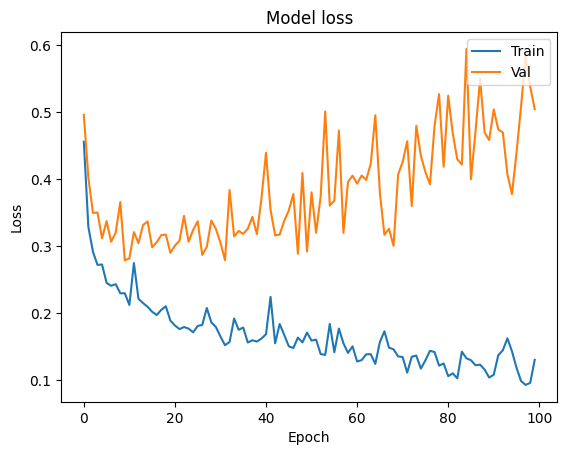

In [76]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

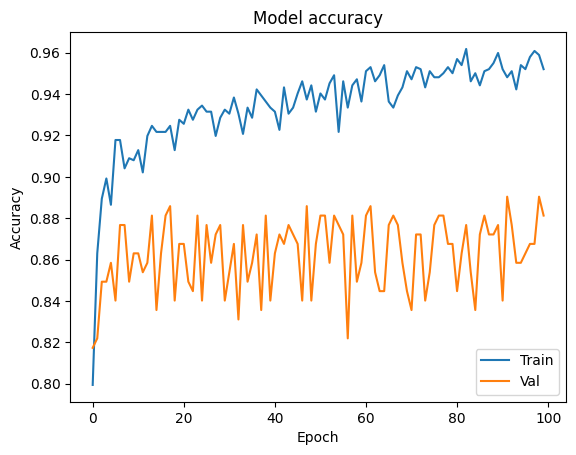

In [78]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [79]:
from keras.layers import Dropout

In [80]:
model_3 = Sequential([
Dense(1000, activation='relu', input_shape=(10,)),
Dropout(0.5),
Dense(1000, activation='relu'),
Dropout(0.5),
Dense(1000, activation='relu'),
Dropout(0.5),
Dense(1000, activation='relu'),
Dropout(0.5),
Dense(1, activation='sigmoid'),
])

In [81]:
model_3.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
batch_size=32, epochs=100,
validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 55ms/step - loss: 0.5460 - accuracy: 0.7162 - val_loss: 0.4432 - val_accuracy: 0.8356
Epoch 2/100
32/32 [==============================] - 2s 61ms/step - loss: 0.3850 - accuracy: 0.8425 - val_loss: 0.4138 - val_accuracy: 0.7900
Epoch 3/100
32/32 [==============================] - 2s 54ms/step - loss: 0.3212 - accuracy: 0.8718 - val_loss: 0.3681 - val_accuracy: 0.8356
Epoch 4/100
32/32 [==============================] - 2s 56ms/step - loss: 0.3385 - accuracy: 0.8669 - val_loss: 0.3546 - val_accuracy: 0.8311
Epoch 5/100
32/32 [==============================] - 2s 72ms/step - loss: 0.3077 - accuracy: 0.8757 - val_loss: 0.3431 - val_accuracy: 0.8311
Epoch 6/100
32/32 [==============================] - 2s 53ms/step - loss: 0.2913 - accuracy: 0.8885 - val_loss: 0.3112 - val_accuracy: 0.8539
Epoch 7/100
32/32 [==============================] - 2s 62ms/step - loss: 0.2737 - accuracy: 0.8933 - val_loss: 0.3542 - val_accuracy: 0.8493
Epoch 

32/32 [==============================] - 2s 57ms/step - loss: 0.1948 - accuracy: 0.9237 - val_loss: 0.2742 - val_accuracy: 0.8630
Epoch 59/100
32/32 [==============================] - 2s 57ms/step - loss: 0.2057 - accuracy: 0.9198 - val_loss: 0.2762 - val_accuracy: 0.8767
Epoch 60/100
32/32 [==============================] - 2s 56ms/step - loss: 0.2040 - accuracy: 0.9207 - val_loss: 0.3163 - val_accuracy: 0.8402
Epoch 61/100
32/32 [==============================] - 2s 60ms/step - loss: 0.2027 - accuracy: 0.9188 - val_loss: 0.3158 - val_accuracy: 0.8493
Epoch 62/100
32/32 [==============================] - 2s 67ms/step - loss: 0.1966 - accuracy: 0.9315 - val_loss: 0.2973 - val_accuracy: 0.8630
Epoch 63/100
32/32 [==============================] - 2s 64ms/step - loss: 0.1969 - accuracy: 0.9227 - val_loss: 0.2887 - val_accuracy: 0.8721
Epoch 64/100
32/32 [==============================] - 2s 61ms/step - loss: 0.2033 - accuracy: 0.9168 - val_loss: 0.2985 - val_accuracy: 0.8676
Epoch 65/100

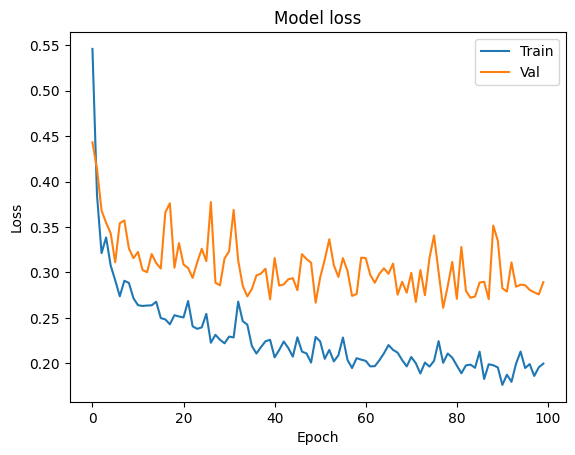

In [82]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

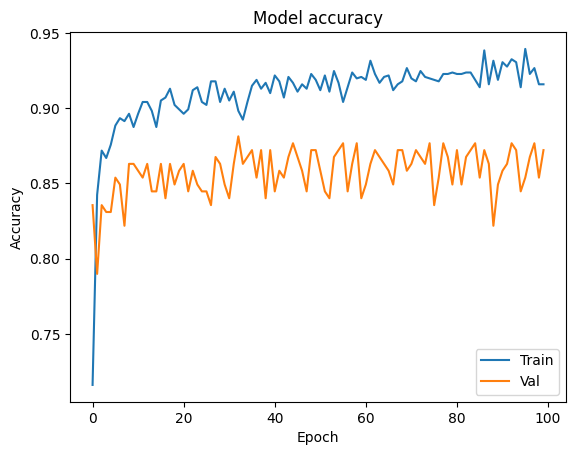

In [84]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()